In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [11]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install pyEMD -t /home/aistudio/external-libraries

mkdir: cannot create directory '/home/aistudio/external-libraries': File exists
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e5/f2/fe8a2a9c3ca6accabb89332aa8e89b7e1b408482ae3ab6816aa7bd1f56b0/pyemd-1.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (662 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [14]:
pip install EMD-signal

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.4
    Uninstalling dill-0.3.4:
      Successfully uninstalled dill-0.3.4
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.12.2
    Uninstalling multiprocess-0.70.12.2:
      Successfully uninstalle

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.signal import hilbert
import numpy  as np

In [15]:
from PyEMD import EMD

In [22]:
# Define signal
dat = pd.read_csv('data/价格.csv')
s = np.array(dat["close_price"])
t = np.array(dat["trade_date"])

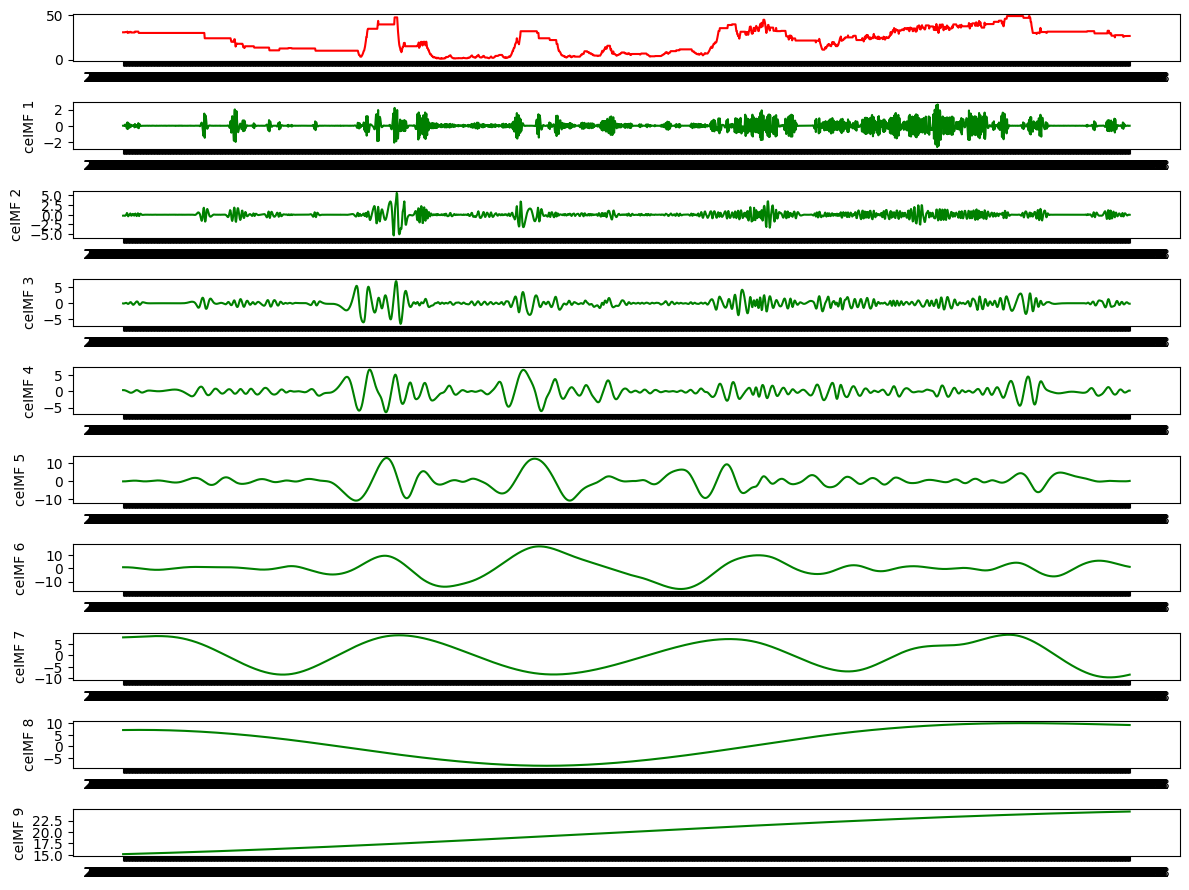

In [29]:
from PyEMD import CEEMDAN

# Assign ICEEMDAN to `eemd` variable
ceemdan = CEEMDAN()


# Execute ICEEMDAN on S
ceIMFs = ceemdan.ceemdan(s, t)
nIMFs = ceIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, ceIMFs[n], 'g')
    plt.ylabel("ceIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
    plt.savefig('example_plot.jpg')

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [31]:
ceIMFs.shape

(9, 2381)

In [34]:
transposed_data = ceIMFs.T  # or data.transpose()

# Convert the transposed numpy array to a pandas DataFrame
kk = pd.DataFrame(transposed_data, columns=['Row1', 'Row2', 'Row3', 'Row4', 'Row5','Row6','Row7','Row8','Row9'])

kk.to_csv('example_data_transposed.csv')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 